In [19]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting.csv')
df = df.rename(columns={'B1_mole': 'B1 mole'})
df_per = pd.read_csv('periodictable.csv')

In [20]:
df.iloc[:,1:8] = df.iloc[:,1:8].fillna(value = 'non')#.drop_duplicates()
df["Label"] = df.iloc[:,1:8].sum(axis = 1)

df["Label"] = [a.replace("non","") for a in df["Label"]]

df

,Unnamed: 0,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,0,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,[S1]SrTi
1,1,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,[S1]SrTi
2,2,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,[S1]SrTi
3,3,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,[S1]SrTiAl
4,4,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,[S1]SrTiAl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,NaN,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,[S151]LaCo
536,536,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,[S151]LaCo
537,537,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,[S151]LaCo
538,538,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,[S151]LaCo


In [21]:
######　組合せの種類を見つけ出す。
######　元素記号をkeyにして各元素のLavelのlistをvalueにもつ辞書を作っておくと便利??
set(df['A'])
dic_A_label_list = {}
for i in set(df['A']):
    #print(i, df[df["A"] == i].drop_duplicates(subset = 'Label')['Label'])
    dic_A_label_list[i] = list(df[df["A"] == i].drop_duplicates(subset = 'Label')['Label'])
#dic_A_label_list    


In [27]:
###### pairwise correlatonをLabelごとにやる
print(dic_A_label_list.keys())
df[df["Label"] == dic_A_label_list["Sr"][2]].loc[:,["A mole","B mole","X mole","CalcT(K)",
                                                    "BandGap(eV)","Surface Area(m2/g)","ProdRate(μmol/gh)"]].corr()

df[df["Label"] == dic_A_label_list["Sr"][2]]

dict_keys(['Cr', 'Na', 'In', 'Sm', 'Y', 'Ni', 'Cu', 'Co', 'Ba', 'Ca', 'La', 'Zn', 'Sb', 'Ga', 'Sr', 'Li', 'Mn', 'K', 'Bi', 'Ag'])


,Unnamed: 0,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
8,8,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.475,0.004,NaN,0.260,0.001,NaN,0.260,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.95,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,66.0,[S3]SrLaTiCr
9,9,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.473,0.007,NaN,0.258,0.003,NaN,0.259,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.90,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,75.0,[S3]SrLaTiCr
10,10,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.468,0.015,NaN,0.256,0.006,NaN,0.256,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.92,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,76.0,[S3]SrLaTiCr
11,11,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.465,0.018,NaN,0.254,0.007,NaN,0.255,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.80,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,90.0,[S3]SrLaTiCr
12,12,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.463,0.022,NaN,0.253,0.008,NaN,0.254,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.85,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,71.0,[S3]SrLaTiCr
13,13,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.458,0.029,NaN,0.250,0.011,NaN,0.251,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.90,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,39.0,[S3]SrLaTiCr


In [23]:
df2 = pd.read_csv('Perovskite_Water_Splitting.csv.csv')
df2.columns
df = df.rename(columns={'CalcT': 'CalcT(K)', 
                        'Calc':'Calc time(h)', 
                        'Prom':'Prom %w',
                        'BandGap':'BandGap(eV)',
                        'Surface Area':'Surface Area(m2/g)',
                        'Light':'Light type',
                        'Power':'Power(W)',
                        'Wave':'Wave length(<nm)',
                        'ProdRate':'ProdRate(μmol/g・h)'}) 

In [24]:
df.columns
df

,Unnamed: 0,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,0,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,[S1]SrTi
1,1,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,[S1]SrTi
2,2,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,[S1]SrTi
3,3,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,[S1]SrTiAl
4,4,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,[S1]SrTiAl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,NaN,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,[S151]LaCo
536,536,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,[S151]LaCo
537,537,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,[S151]LaCo
538,538,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,[S151]LaCo


In [29]:
df.corr()

,Unnamed: 0,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,CalcT(K),Calc time(h),Prom %w,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh)
Unnamed: 0,1.000000,-0.032855,0.217359,0.997185,-0.024519,-0.115264,NaN,-0.088122,-0.498498,-0.209463,0.012537,-0.001781,0.001906,0.083438,0.145863,-0.056724,0.030234,0.054955,0.102748
A mole,-0.032855,1.000000,-0.356914,1.000000,-0.749434,-0.508028,NaN,-0.057645,-0.016374,0.261125,0.230877,0.088590,-0.254105,0.027503,0.015790,0.104857,-0.059501,0.072484,-0.158757
A1 mole,0.217359,-0.356914,1.000000,-1.000000,-0.232497,-0.111198,NaN,-0.070936,-1.000000,-0.136596,-0.191810,-0.030926,0.203823,-0.191680,-0.149554,0.146573,-0.037666,-0.023517,-0.137319
A2 mole,0.997185,1.000000,-1.000000,1.000000,-1.000000,NaN,NaN,-1.000000,NaN,-0.655336,-1.000000,-0.782576,-0.633693,NaN,1.000000,NaN,-1.000000,1.000000,-0.158768
B mole,-0.024519,-0.749434,-0.232497,-1.000000,1.000000,-0.292746,NaN,-0.023138,-0.129167,-0.139692,-0.219869,-0.147677,0.346754,-0.061776,0.017156,-0.169383,0.139289,-0.126344,0.184464
B1 mole,-0.115264,-0.508028,-0.111198,NaN,-0.292746,1.000000,NaN,-0.178619,-0.998978,-0.183353,-0.253340,0.047207,0.107610,0.239300,-0.024370,0.126150,-0.251436,-0.118539,0.253450
B2 mole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X mole,-0.088122,-0.057645,-0.070936,-1.000000,-0.023138,-0.178619,NaN,1.000000,0.491727,-0.277239,-0.047669,0.044106,-0.164308,0.055145,0.016051,0.154475,0.321076,0.007793,-0.033910
X1 mole,-0.498498,-0.016374,-1.000000,NaN,-0.129167,-0.998978,NaN,0.491727,1.000000,0.004815,0.624061,-0.075985,-0.340583,-0.033295,0.482639,-0.486310,0.440209,-0.468937,-0.126222
CalcT(K),-0.209463,0.261125,-0.136596,-0.655336,-0.139692,-0.183353,NaN,-0.277239,0.004815,1.000000,0.195638,-0.096071,0.260121,-0.458989,0.270184,-0.199073,-0.066416,0.033873,-0.038906


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'A mole'),
  Text(2.5, 0, 'A1 mole'),
  Text(3.5, 0, 'A2 mole'),
  Text(4.5, 0, 'B mole'),
  Text(5.5, 0, 'B1 mole'),
  Text(6.5, 0, 'B2 mole'),
  Text(7.5, 0, 'X mole'),
  Text(8.5, 0, 'X1 mole'),
  Text(9.5, 0, 'CalcT(K)'),
  Text(10.5, 0, 'Calc time(h)'),
  Text(11.5, 0, 'Prom %w'),
  Text(12.5, 0, 'BandGap(eV)'),
  Text(13.5, 0, 'Surface Area(m2/g)'),
  Text(14.5, 0, 'CatW'),
  Text(15.5, 0, 'Alcohol%'),
  Text(16.5, 0, 'Power(W)'),
  Text(17.5, 0, 'Wave length(<nm)'),
  Text(18.5, 0, 'ProdRate(μmol/gh)')])

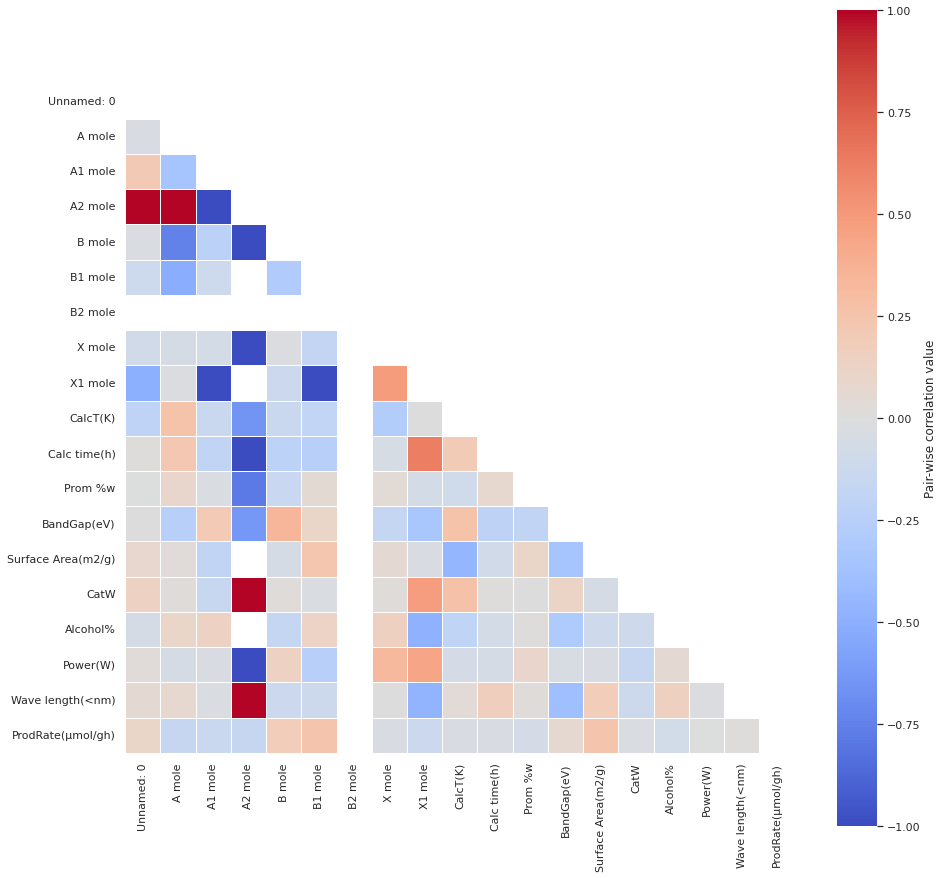

In [30]:
import seaborn as sns
sns.set(style="white")

corr = df.corr()


mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 100, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={'label': 'Pair-wise correlation value'})
sns.set(font_scale=1)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
